In [30]:
import numpy as np
import matplotlib.pyplot as plt

n = 1547

i15less = round(n*.11)
i15to25 = round(n*.26)
i25to35 = round(n*.22)
i35to50 = round(n*.17)
i50to100 = round(n*.14)
i100over = round(n*.09)

salaries = [i15less, i15to25, i25to35, i35to50, i50to100, i100over]
salaries

[170, 402, 340, 263, 217, 139]

In [31]:
print(f'Total: {sum(salaries)}, Total percent: {sum([11,26,22,17,14,9])}')

Total: 1531, Total percent: 99


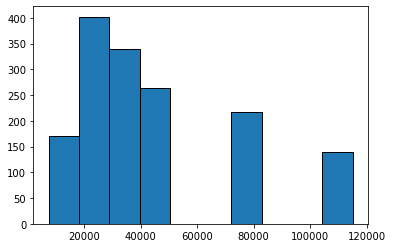

In [32]:
s15 = [7500 for x in range(i15less)]
s25 = [20000 for x in range(i15to25)]
s35 = [30000 for x in range(i25to35)]
s50 = [42500 for x in range(i35to50)]
s100 = [75000 for x in range(i50to100)]
s115 = [115000 for x in range(i100over)]

new_distr = s15 + s25 + s35 + s50 + s100 + s115
new_distr = pd.Series(new_distr)

plt.hist(new_distr, bins =10, edgecolor = 'black')
plt.show()

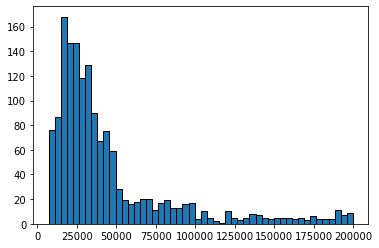

In [33]:
import pandas as pd
import random
random.seed(100)

s15less = [random.randrange(7000,15000) for x in range(i15less)]
s15to25 = [random.randrange(15000,25000) for x in range(i15to25)]
s25to35 = [random.randrange(25000,35000) for x in range(i25to35)]
s35to50 = [random.randrange(35000,50000) for x in range(i35to50)]
s50to100 = [random.randrange(50000,100000) for x in range(i50to100)]
s100over = [random.randrange(100000,200000) for x in range(i100over)]

distr = s15less + s15to25 + s25to35 + s35to50 + s50to100 + s100over
distr = pd.Series(distr)

plt.hist(distr, bins =50, edgecolor = 'black')
plt.show()

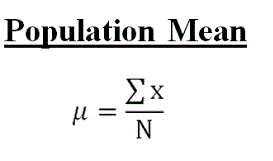

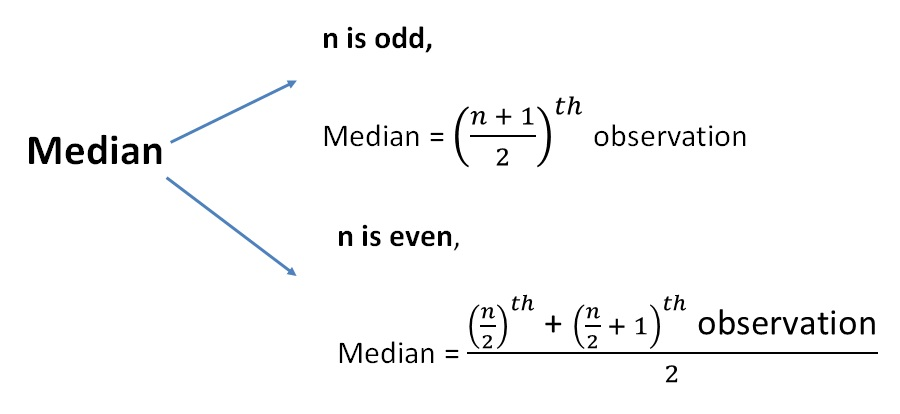

In [34]:
def myMean(x):
    return sum(x)/len(x)

def myMedian(x):
    s = sorted(x)
    if len(x) % 2 == 0:
        return (s[round(len(distr)/2)-1] + s[round(len(distr)/2)])/2
    else:
        return s[round(len(distr)/2)-1]

print(f'My mean: {round(myMean(distr),2)}, Numpy mean: {round(np.mean(distr),2)}, My median: {myMedian(distr)}, Numpy median: {np.median(distr)}')

My mean: 44765.53, Numpy mean: 44765.53, My median: 30759, Numpy median: 30759.0


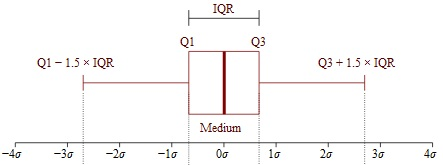


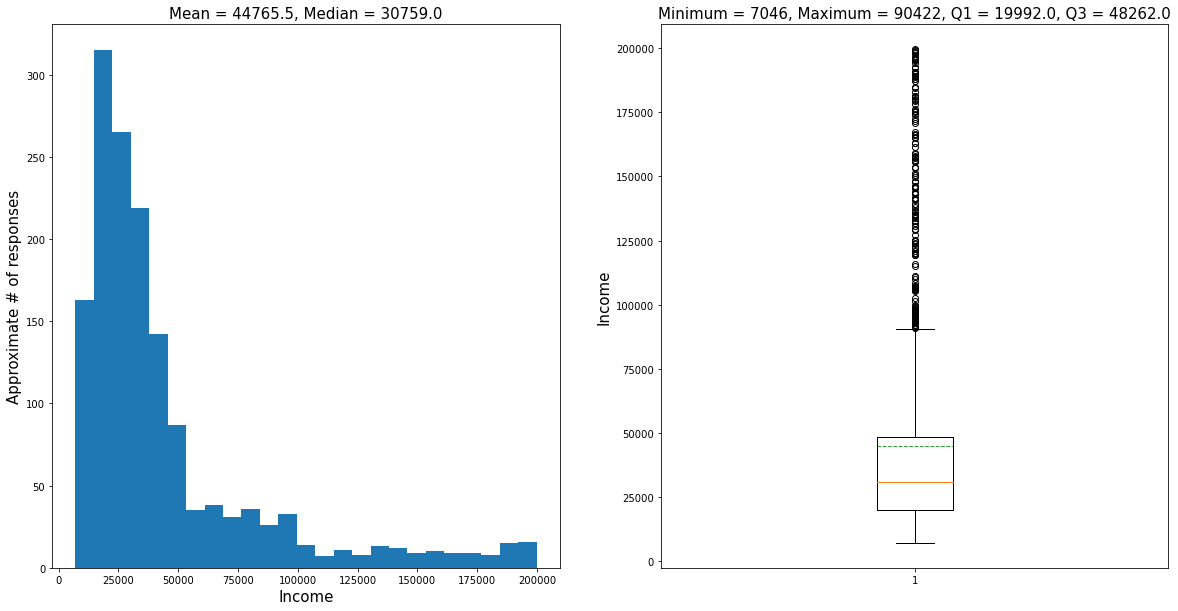

In [35]:
plt.figure(figsize=(20,10))

mean = round(np.mean(distr),1)
median = np.median(distr)

plt.subplot(1,2,1)
plt.hist(distr,bins=25)
plt.title(f'Mean = {mean}, Median = {median}', fontsize=15)
plt.xlabel('Income', fontsize=15)
plt.ylabel('Approximate # of responses', fontsize = 15)


Q3 = np.percentile(distr,75)
Q1 = np.percentile(distr,25)
IQR = Q3 - Q1
maximum = distr[distr<(Q3+(1.5*IQR))].max()
minimum = distr.min()

plt.subplot(1,2,2)
plot = plt.boxplot(distr, showmeans=True, meanline=True)
plt.title(f'Minimum = {minimum}, Maximum = {maximum}, Q1 = {Q1}, Q3 = {Q3}', fontsize=15)
plt.ylabel('Income', fontsize=15)

plt.show()

In [39]:
Uss_Salary = 22561086/12

distr = s15less + s15to25 + s25to35 + s35to50 + s50to100 + s100over
distr.append(Uss_Salary)
distr = pd.Series(distr)

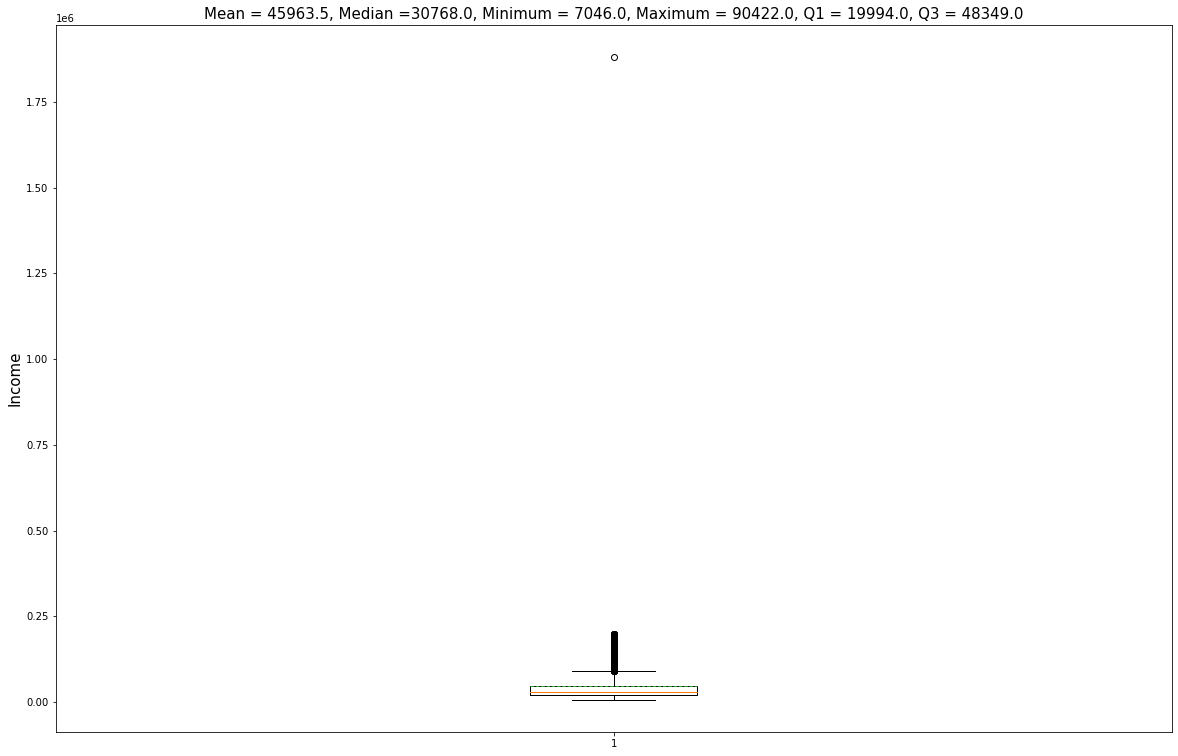

In [40]:
mean = round(np.mean(distr),1)
median = np.median(distr)

Q3 = np.percentile(distr,75)
Q1 = np.percentile(distr,25)
IQR = Q3 - Q1
maximum = distr[distr<(Q3+(1.5*IQR))].max()
minimum = distr.min()

plt.figure(figsize=(20,13))

plot = plt.boxplot(distr, showmeans=True, meanline=True)
plt.title(f'Mean = {mean}, Median ={median}, Minimum = {minimum}, Maximum = {maximum}, Q1 = {Q1}, Q3 = {Q3}', fontsize=15)
plt.ylabel('Income', fontsize=15)

plt.show()

In [41]:
print(f'Our sample mean is: {round(myMean(distr),2)}, Our sample median is: {myMedian(distr)}')

Our sample mean is: 45963.52, Our sample mean is: 30768.0


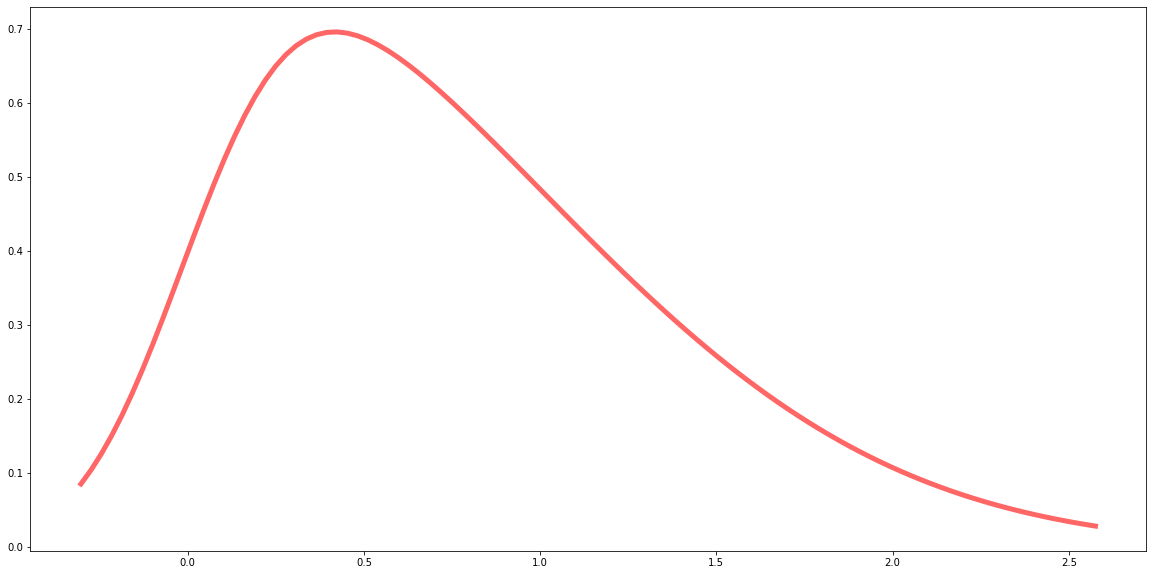

In [9]:
from scipy.stats import skewnorm
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

a = 4
mean, var, skew, kurt = skewnorm.stats(a, moments='mvsk')

x = np.linspace(skewnorm.ppf(0.01, a),
                skewnorm.ppf(0.99, a), 100)
plt.plot(x, skewnorm.pdf(x, a),
       'r-', lw=5, alpha=0.6, label='skewnorm pdf')

## Sources

Sample data: https://ngs24.ru/text/job/2020/10/05/69492859/

Uss salary: http://www.krskstate.ru/governor/dohod
